# ECE 543 HW3 Problem 4

## Test AdaBoost

In [5]:
# Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

print("Modules imported!")

Modules imported!


In [6]:
# Data Preprocessing
bankdata = pd.read_csv('bill_authentication.csv')
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

In [7]:
### TODO: 4(a) Implement an AdaBoost classifier with 5 base learners 
# nTrials: split the data randomly for nTrials times and compute the average test accuracy
nLearner = 5
nTrials = 10
accuracies = np.zeros((nTrials,))

for t in range(nTrials):
    # Separate the data into training and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=5, algorithm='SAMME.R')
    classifier.fit(X_train, y_train)
    y_hat = classifier.predict(X_test)
    accuracies[t] = (y_hat==y_test).sum()/len(y_hat)
print('The test accuracy for AdaBoost is: %d %%' % (100 * accuracies.mean()))

The test accuracy for AdaBoost is: 91 %


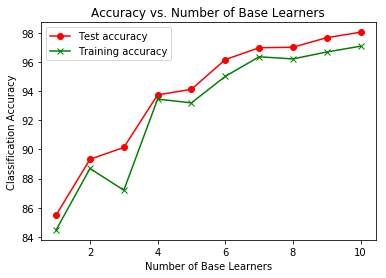

In [8]:
### TODO: 4(b) Generate a figure of test accuracy of AdaBoost 
# as a function of the number of base learners. Report your observation.
nLearners = list(range(1, 11))
accuraciesTr = [0]*10
accuraciesTx = [0]*10
nLearner = 5
nTrials = 10

for i, n in enumerate(nLearners):
    _accuraciesTr = np.zeros((nTrials,))
    _accuraciesTx = np.zeros((nTrials,))
    for t in range(nTrials):
        # Separate the data into training and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
        classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=n, algorithm='SAMME.R')
        classifier.fit(X_train, y_train)
        y_hat = classifier.predict(X_train)
        _accuraciesTr[t] = (y_hat==y_train).sum()/len(y_hat)
        y_hat = classifier.predict(X_test)
        _accuraciesTx[t] = (y_hat==y_test).sum()/len(y_hat)
    accuraciesTr[i] = _accuraciesTr.mean() * 100.
    accuraciesTx[i] = _accuraciesTx.mean() * 100.

fig = plt.figure()
plt.plot(nLearners, accuraciesTr, color='r', marker='o')
plt.plot(nLearners, accuraciesTx, color='g', marker='x')
plt.xlabel('Number of Base Learners')
plt.ylabel('Classification Accuracy')
plt.title('Accuracy vs. Number of Base Learners')
plt.legend({'Training accuracy', 'Test accuracy'}, loc='best')
plt.show()
plt.close()